# Regresión Logística

La regresión logística (`LOGR`, de logistic regression en inglés) es también conocida como regresión logit,clasificación por máxima entropía o clasificación log-linear. A pesar de que en su nombre aparezca la palabra regresión, no tiene que ver con la regresión, sino que es un algoritmo para realizar clasificación.
La forma que `LOGR` tiene para hacer la clasificación se basa en la idea de encontrar una frontera lineal
entre dos clases a partir de la transformación exponencial de una combinación lineal de los atributos. 

Como veremos, esta transformación exponencial permite definir una frontera suave entre las dos clases.
Esto crea una distribución de probabilidad continua entre las dos clases con una forma muy característica, denominada función logística, que observamos en la Figura.

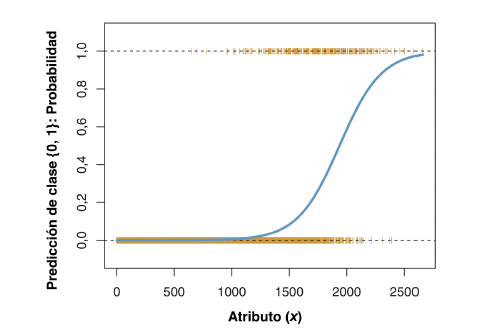

En la Figura se muestra un conjunto de datos con un único atributo (`x`) y una clase binaria con valores
{`0, 1`}. Los puntos del conjunto de datos están representados por pequeños segmentos verticales de color
naranja, unos en la parte inferior de la figura (ejemplos de clase `0`) y otros en la parte superior (ejemplos de clase `1`). La predicción de LOGR se muestra en color azul de forma continua para todo el rango de valores del atributo `x`, con el objetivo de mostrar cómo varía su predicción en función del valor de x.



>NOTE: El objetivo del clasificador `LOGR` no es predecir si la clase de un ejemplo ei es `0` o `1`, sino predecir la probabilidad `Pi` de que su clase sea `1`. Una vez se obtenga dicha probabilidad, es posible extraer una predicción binaria siguiendo esta simple regla: si `Pi < 0,5`, entonces la predicción de la clase se considera `1`; si `Pi ≤ 0,5`, entonces se considera `0`.
Aunque hemos indicado `0,5` como valor umbral para la decisión de clase, es posible usar otros
umbrales incluso más eficaces. De hecho, se podría encontrar de forma automática cuál es el
umbral óptimo con el que se maximiza la bondad de las predicciones del clasificador.

La regresión logística nos permite resolver problemas con dos posibles estados “SI/NO”: binario o un número finito de “etiquetas” o “clases”: múltiple. Aunque el nombre Regresión logística sugiere una operación de regresión, el objetivo de la Regresión logística es la clasificación.

Algunos Ejemplos de Regresión Logística son:

    - Clasificar si el correo que llega es Spam o No es Spam
    - Dados unos resultados clínicos de un tumor clasificar en “Benigno” o “Maligno”
    - El texto de un artículo a analizar es: Entretenimiento, Deportes, Política ó Ciencia
    - A partir de historial bancario conceder un crédito o no

Lo que distingue a un modelo de regresión logística del modelo de regresión lineal es que la variable de resultado en la regresión logística es binaria o dicotómica
Podemos ver en la siguiente figura que la salida de la regresión lineal pasa a través de una función de activación que puede mapear cualquier valor real entre 0 y 1.

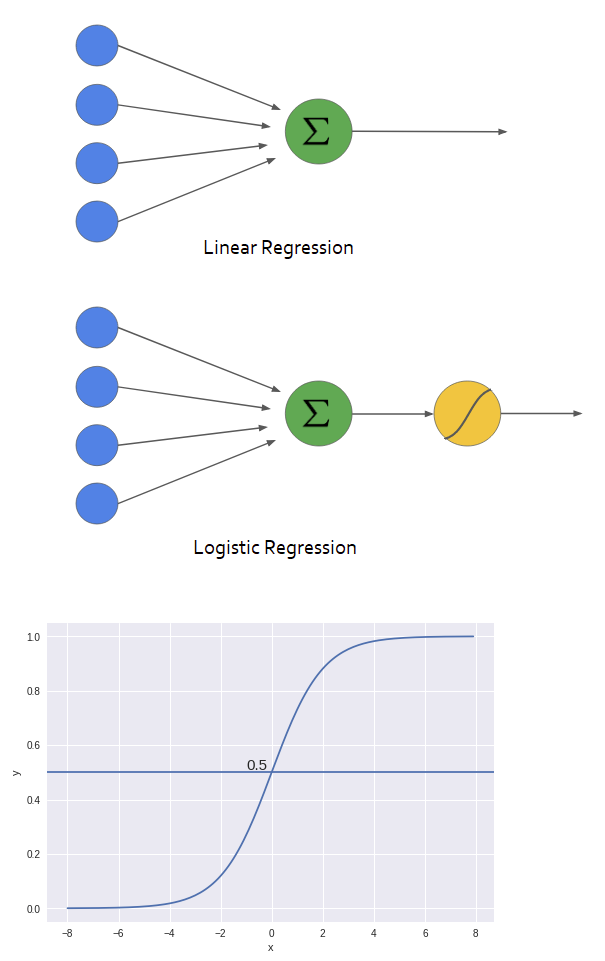

In [9]:
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn import preprocessing
from evaluacion_funciones import *
import warnings
warnings.filterwarnings("ignore")

Con el objetivo de visualizar en dos dimensiones las regiones de clasificación del modelo LOGR, hemos
tomado únicamente los dos atributos del pétalo de la flor de “iris” (atributos tercero y cuarto). 

In [2]:
# Carga de datos.
datos = load_iris()
X = datos.data[:,2:] # Utilizamos solo 2 atributos.
y = datos.target
print(np.shape(X))

(150, 2)


In [3]:
# Métricas de evaluación.

"""
En problemas de clasificación utilizamos otras métricas.
ACC
PREC
RECALL
F1
"""


metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')}

In [4]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, 
                                                                y, 
                                                                test_size=0.2, 
                                                                random_state=42)
print(np.shape(X_training))

(120, 2)


In [ ]:
# ------------- TRAINING ---------------- #

In [ ]:
# 2) Extracción de características

In [5]:
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)
# print(X_stdr)

In [ ]:
# 4) Selección de atributos

Se crea, a continuación, un objeto de tipo LogisticRegression, cuyo algoritmo de búsqueda ha sido configurado con `solver='saga'`. El algoritmo `saga` utiliza la optimización stochastic average gradient descent y tiene la ventaja de ser muy eficiente en tiempo de ejecución.

In [6]:
# 5) Construcción del algoritmo de aprendizaje.
algoritmos = {'LOGR': LogisticRegression(penalty='l1', 
                                         solver='saga', 
                                         max_iter=1000, 
                                         random_state=42, 
                                         multi_class='ovr')}

In [7]:
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_stdr, y_training, 
                                       cv=KFold(n_splits=10, shuffle=True, random_state=42))
    results = evaluacion(y_training, y_pred[nombre], metricas)
    print(metrics.confusion_matrix(y_training, y_pred[nombre]))
    print(results)


[[40  0  0]
 [ 1 37  3]
 [ 0  5 34]]
{'ACC': 0.925, 'PREC': 0.925, 'RECALL': 0.925, 'F1': 0.925}


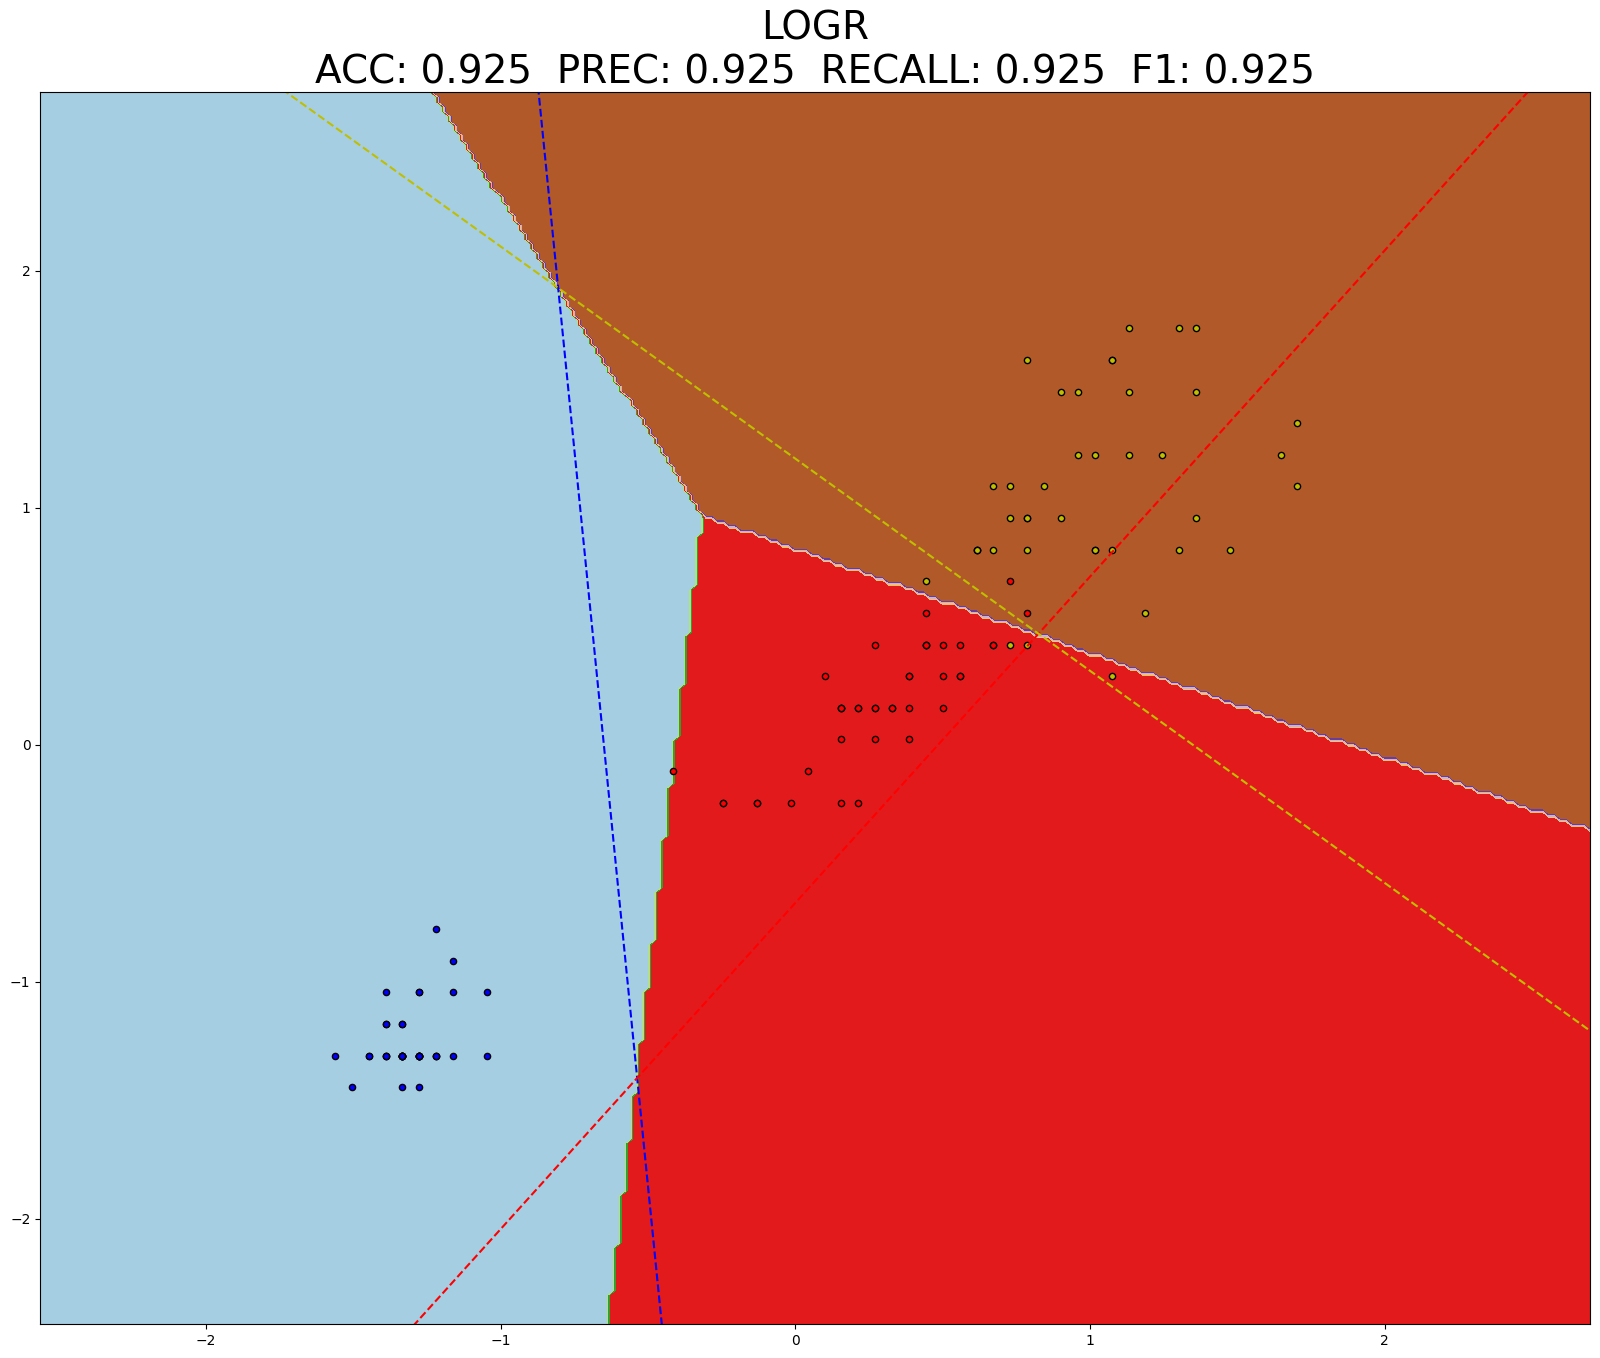

In [10]:
# 5.2) Entrenamiento del modelo definitivo
model = algoritmos['LOGR'].fit(X_stdr, y_training)

# Visualización de las fronteras de decisión
mapa_modelo_clasif_2d(X_stdr, y_training, model, results, nombre)

En esta gráfica se muestran las regiones que el clasificador ha aprendido en su modelo. Cualquier punto de test futuro será clasificado según la región en la que se encuentre en dicho mapa, y la probabilidad asignada por el clasificador a la clase predicha será mayor conforme dicho punto se aleje de las fronteras de decisión.

Es importante apreciar en la Figura que las fronteras de decisión marcadas con líneas discontinuas fueron obtenidas para cada submodelo binario `LOGR` entrenado con clases de tipo `OvR` (One-vs-Rest). Por ejemplo, la frontera de decisión de la clase de color azul (línea discontinua azul) fue ajustada por el submodelo binario `LOGR` especializado únicamente en predecir si la clase es azul o no es azul.

In [ ]:
# ------------- PREDICTION ---------------- #

In [ ]:
# 6) Extracción de las características de test

In [11]:
# 7) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [ ]:
# 8) Selección de los atributos de test 

In [12]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
print(y_pred_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [13]:
# 10) Evaluación del modelo sobre el conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
print(results)
print(metrics.confusion_matrix(y_testing, y_pred_test))

{'ACC': 1.0, 'PREC': 1.0, 'RECALL': 1.0, 'F1': 1.0}
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Curva ROC

Una de las métricas más utilizadas para medir la bondad de los clasificadores que son capaces de estimar la probabilidad de una clase binaria es la métrica `AUC` (de area under curve en inglés), que es el área bajo la curva `ROC`. La curva `ROC` (de receiver operating characteristic en inglés) **mide la relación entre las tasas de aciertos y de falsos positivos en función del umbral de clasificación**. Cuanto mayor sea el área bajo la curva `ROC`, mejor será el clasificador. Un clasificador perfecto tendría un valor de `AUC = 1`.

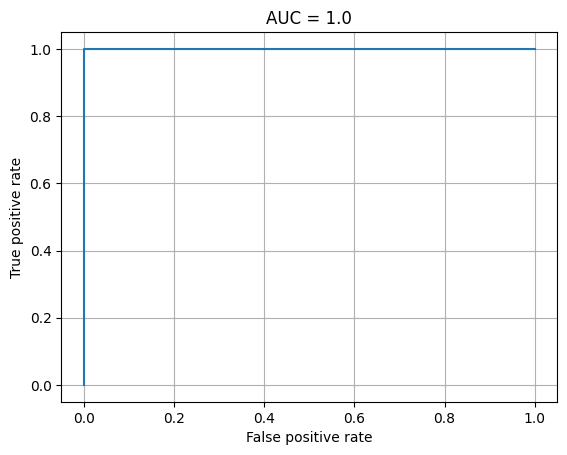

In [14]:
# Ploteamos la curva ROC
y_proba_test = model.predict_proba(X_test_stdr) # "predict_proba" para extraer probabilidades vez de predicciones. Necesitamos extraer las probablidades de las predicciones para trabajar con la curva ROC

y_test_bin = preprocessing.label_binarize(y_testing, classes=[0,1,2]) # Usar "label_binarize" en el caso de problemas multiclase

auc = metrics.roc_auc_score(y_testing, y_proba_test, multi_class='ovr') # Area Under the ROC curve (AUC)

fpr, tpr, th = metrics.roc_curve(y_test_bin[:,1], y_proba_test[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()

Como hemos podido observar, el algoritmo LOGR está diseñado para clasificación binaria. Es decir, la clase solo toma dos valores (por ejemplo, {0, 1}). Sin embargo, con LOGR es posible también resolver un problema de clasificación multinomial (también llamada multiclase), esto es, cuando la clase posee más de dos valores.

Un ejemplo de clasificación multiclase podría ser el problema de predicción de un riesgo de incendio en bajo, medio o alto.

>NOTE: Para resolver un problema de clasificación multinomial con m > 2 clases mediante un algoritmo
de clasificación binaria, como LOGR, se lleva cabo la descomposición del problema original en
m subproblemas de clasificación binaria de tipo One-vs-Rest (OvR, una contra el resto). En cada
subproblema, las instancias son las mismas que las del conjunto original, con los mismos atributos,
pero con una clase distinta, de tipo binario.

### Clasificación One-vs-Rest (OvR)

Por ejemplo, si `m = 3`, el primer subproblema binario se formaría con la `clase 1` contra el resto. En este subproblema, la clase `{0, 1}` significaría que, si la `clase es 1`, la instancia es de `clase 1`, pero si la clase fuera `0`, significaría que la clase es `2` o bien `3` (no es de clase 1). Por ejemplo, en el subproblema binario para la `clase 2`, la `clase {0,1}` significaría que, si la clase es `1`, la instancia es de `clase 2`, pero si la clase fuera `0`, significaría que la clase es `1` o bien `3` `(no es de clase 2)`. Y de forma análoga para el tercer subproblema.

La división del problema multiclase en subproblemas binarios de tipo `OvR` permite realizar una clasificación multinomial usando clasificadores binarios. Cada clasificador binario, una vez entrenado, aprendería una frontera lineal de decisión que enfrenta cada clase con las restantes, tal como se muestra en la Figura para un problema con 3 clases:

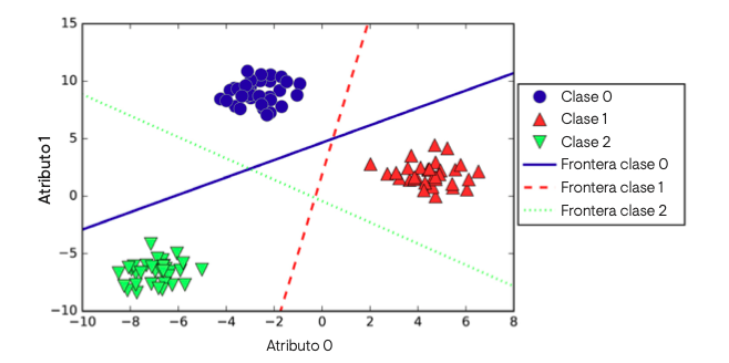

Una vez que se obtienen las fronteras de los clasificadores binarios, se pueden crear las regiones de decisión multinomial, tal como se muestra en la Figura 16. Para ello, se calculan las líneas bisectrices a partir de los puntos de corte de las fronteras de decisión binarias.

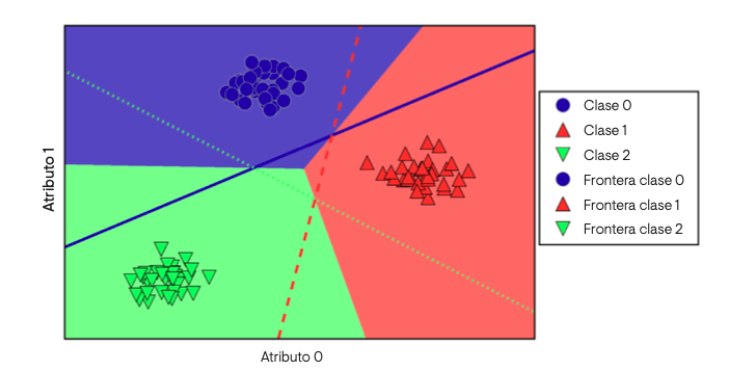

El algoritmo LOGR posee una serie de ventajas e inconvenientes que es importante señalar. Las ventajas fundamentales que podríamos destacar son:

- La simplicidad del modelo. El modelo de LOGR es muy parecido al de OLS y, por tanto, comparte su simplicidad. Se trata de un modelo basado en una ecuación matemática simple, cuyo ajuste y evaluación son sencillos.

- La fácil interpretabilidad de las predicciones. Al igual que OLS, el modelo es sencillo de interpretar observando la importancia de cada atributo según la magnitud de su coeficiente asociado. A mayor coeficiente, en valor absoluto, mayor importancia tiene el atributo. Al igual que OLS, por el signo del coeficiente sabemos si la relación de cada atributo con la clase es directa (signo positivo) o inversa (signo negativo).

- El tiempo de ejecución del entrenamiento muy razonable. Al igual que OLS, el entrenamiento consiste en el ajuste de los coeficientes de la combinación lineal de los atributos mediante un proceso iterativo de búsqueda y optimización. Los tiempos de entrenamiento de LOGR son similares a los de OLS, aun- que algo superiores, debido al cálculo de exponentes y logaritmos en la función objetivo.

- El tiempo de ejecución de la predicción casi instantáneo. Una vez entrenado el modelo LOGR, realizar las predicciones es inmediato. Tan solo hay que evaluar la función matemática del modelo usando los atributos de los ejemplos de test.